<a id='top'></a>
## Udacity_________________________ Data Analyst Nanodegree Program  `DAND`

# Project: Investigating the [Medical Appointment No Shows](https://www.kaggle.com/joniarroba/noshowappointments/kernels) dataset

Friday 2020-05-08
<br />
By: Riad Baziz
<br />
Algeria
<br />
From: **`One Million Arab Coders`**


### Table of Contents
<ul>
<li><a href="#intro">1) Introduction</a></li>
<li><a href="#quest">2) Questions</a></li>
<li><a href="#wrangling">3) Data Wrangling</a></li>
        <ul>
        <li><a href="#gather">Load packages & gathering data</a></li>
        <li><a href="#assess">Assessing data</a></li>
        <li><a href="#clean">Cleaning and trimming data</a></li>
        </ul>
<li><a href="#eda">4) Exploratory Data Analysis</a></li>
       <ul>
        <li><a href="#rq1">Research Question 1</a></li>
        <li><a href="#rq2">Research Question 2</a></li>
        <li><a href="#rq3">Research Question 3</a></li>
        <li><a href="#rq4">Research Question 4</a></li>
        <li><a href="#rq5">Research Question 5</a></li>
        <li><a href="#rq6">Research Question 6</a></li>
        <li><a href="#rq7">Research Question 7</a></li>
       </ul>
<li><a href="#conclusions">5) Conclusions</a></li>
<li><a href="#references">6) References</a></li>
</ul>

<a id='intro'></a>
## 1) Introduction <a href="#top">^</a>

>  Based on my choice, in this project I’ll analyze the [Medical Appointment No Shows](https://www.kaggle.com/joniarroba/noshowappointments/kernels) dataset, it’s a dataset who holds informations about 110.527 medical appointments of different patients from different neighborhoods in Brazil.
<br /> This dataset is built for the purpose of finding out the reasons that made patients not showed up at their scheduled
appointment. Thus, it contains one dependent variable called `No-Show` (which take the ‘No’ cardinality when the patient shows up at the scheduled appointment and ‘Yes’ when he don't show up), and to understand the reasons for this behavior, 13 other variables were collected in parallel with the main information, which is the showing up or not at each medical appointment.


> You can see more details about the 14 data's features in the table below:

| N° 	| Feature        	| Description                                                                                                                                	|
|:----:	|:----------------	|:--------------------------------------------------------------------------------------------------------------------------------------------	|
| 1  	| **PatientId**      	| Identification of a patient                                                                                                                	|
| 2  	| **AppointmentID**  	| The day someone called or registered the appointment, this is before appointment of course.                                                	|
| 3  	| **Gender**         	| Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.                          	|
| 4  	| **ScheduledDay**   	| The day of the actuall appointment, when they have to visit the doctor.                                                                    	|
| 5  	| **AppointmentDay** 	| The day someone called or registered the appointment, this is before appointment of course.                                                	|
| 6  	| **Age**            	| How old is the patient.                                                                                                                    	|
| 7  	| **Neighbourhood**  	| Where the appointment takes place.                                                                                                         	|
| 8  	| **Scholarship**    	| True of False . Observation, this is a broad topic, consider reading this article [here](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) 	|
| 9  	| **Hipertension**   	| True or False                                                                                                                              	|
| 10 	| **Diabetes**       	| True or False                                                                                                                              	|
| 11 	| **Alcoholism**     	| True or False                                                                                                                              	|
| 12 	| **Handcap**        	| True or False                                                                                                                              	|
| 13 	| **SMS_received**   	| 1 or more messages sent to the patient.                                                                                                    	|
| 14 	| **No-show**        	| 'No' the patient showed up;'Yes' for a no-show                                                                                             	|

<br/>

> This study will be purely descriptive,and i will focus on only 6 vaiables, one dependent variable called `No-show` and 5 independents variables which are : `Gender`, `Age`, `Scholarship`, `Hipertension`, `Diabetes`.

<a id='quest'></a>
## 2)  Questions <a href="#top">^</a>
### Main question:
What are the factors that may cause patients not to show up at their scheduled medical appointments?

### Intermediate questions:
1. What is the overall rate of patients for both (show up / not show up) at the medical appointment?
* How many patients are female and are male, and what's the proportion of no-showing up at the appointment for each Gender?
* What are the characteristics of patients in terms of age? 
* How many patients  and what's the no-showing rate for each age category?
* How many patients have (a scholarship / don't have it), and what's the proportion of no-showing up at the appointment for each situation?
* How many patients have( hypertension / don't have it), and what's the proportion of no-showing up at the appointment for each situation?
* How many patients are (diabetics / not diabetics), and what's the proportion of no-showing up at the appointment for each situation?

<a id='wrangling'></a>
## 3) Data Wrangling <a href="#top">^</a>

> **In this section I'll proceed through three stages:**
* Load packages & gathering data
* Assessing data
* Cleaning and trimming data



<a id='gather'></a>
**1) Loading required libraries & gathering data** <a href="#top">^</a>

In [1]:
# import required packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# loading the 'Medical Appointment No Slows' dataset
df = pd.read_csv('KaggleV2-May-2016.csv')

# data overview
print('The dataset has :',df.shape[0],' rows, and :',df.shape[1],' columns.')
df.head()

The dataset has : 110527  rows, and : 14  columns.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


 <a id='assess'></a>
 **2) Assessing data** <a href="#top">^</a>
  > * In this section I'll try to identify any problems in my data's quality or structure


In [3]:
# get information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **observations:**
* there are some issues in the columns' names that should be fixed.
* there are no missed values.
* the data type of 'PatientId' should be turned from 'float' to 'int'.
* the data type of 'ScheduledDay' and 'AppointmentDay' is wrong, it should be turned to 'datetime'.
* the variables ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show] are categorical, so their data type should be as 'category'.

In [4]:
# describing data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **observation:**
* The minimum value of the age variable equal -1, less than 0!

In [5]:
# check for negative values in the 'Age' column
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


> **observation:**
* in this line 'Age' = -1, i assume that is an incorrect value that should be dropped

In [6]:
# checking for missing values
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

> **observation:**
* there are not missing value

In [7]:
# checking for duplicate data
df.duplicated().sum()

0

> **observation:**
* there are not duplicate data

In [8]:
# Print Unique Values
print('there are ',df.Gender.nunique()," Unique Values in `Gender` =>" , df.Gender.unique())
print('there are ',df.Scholarship.nunique()," Unique Values in `Scholarship` =>" , df.Scholarship.unique())
print('there are ',df.Hipertension.nunique()," Unique Values in `Hipertension` =>" , df.Hipertension.unique())
print('there are ',df.Diabetes.nunique()," Unique Values in `Diabetes` =>" , df.Diabetes.unique())
print('there are ',df.Alcoholism.nunique()," Unique Values in `Alcoholism` =>" , df.Alcoholism.unique())
print('there are ',df.Handcap.nunique()," Unique Values in `Handcap` =>" , df.Handcap.unique())
print('there are ',df.SMS_received.nunique()," Unique Values in `SMS_received` =>" , df.SMS_received.unique())
print('there are ',df['No-show'].nunique()," Unique Values in `No-show` =>" , df['No-show'].unique())
print('there are ',df.Neighbourhood.nunique(),"Unique Values in `Neighbourhood` =>" , df.Neighbourhood.unique())



there are  2  Unique Values in `Gender` => ['F' 'M']
there are  2  Unique Values in `Scholarship` => [0 1]
there are  2  Unique Values in `Hipertension` => [1 0]
there are  2  Unique Values in `Diabetes` => [0 1]
there are  2  Unique Values in `Alcoholism` => [0 1]
there are  5  Unique Values in `Handcap` => [0 1 2 3 4]
there are  2  Unique Values in `SMS_received` => [0 1]
there are  2  Unique Values in `No-show` => ['No' 'Yes']
there are  81 Unique Values in `Neighbourhood` => ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARA

 <a id='clean'></a>
**3) Cleaning and trimming data** <a href="#top">^</a>
 > **In this section I'll go through the steps below:**
 * Renaming to relevant column names
 * Converting variables to the correct data types
 * Triming data regarding the variables needed in the research questions

In [9]:
# current columns' names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [10]:
# Rename incorrect columns' names and makes it all a lower case

new_labls = ['patient_Id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'appointment']
df.columns = new_labls

In [11]:
# Convert PatientId from Float to Integer
df['patient_Id'] = df['patient_Id'].astype('int64')

In [12]:
# convert all the categorical variables from 'int' to 'category' type

df['gender'] = df['gender'].astype('category')
df['scholarship'] = df['scholarship'].astype('category')
df['hypertension'] = df['hypertension'].astype('category')
df['diabetes'] = df['diabetes'].astype('category')
df['alcoholism'] = df['alcoholism'].astype('category')
df['handicap'] = df['handicap'].astype('category')
df['sms_received'] = df['sms_received'].astype('category')
df['appointment'] = df.appointment.astype('category')

In [13]:
# update variables' categories

df.appointment.cat.rename_categories(['Show','No Show'], inplace = True)

df.gender.cat.rename_categories(['Female','Male'], inplace = True)

df.scholarship.cat.rename_categories(['No Scholarship','Scholarship'], inplace = True)

df.hypertension.cat.rename_categories(['No Hypertension','Hypertension'], inplace = True)

df.diabetes.cat.rename_categories(['No Diabetes','Diabetes'], inplace = True);


In [14]:
# Convert 'scheduled_day' and 'appointment_day' from 'object' type to 'datetime64[ns]'
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date.astype('datetime64[ns]')
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date.astype('datetime64[ns]')

df.head()


,patient_Id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,appointment
0,29872499824296,5642903,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No Scholarship,Hypertension,No Diabetes,0,0,0,Show
1,558997776694438,5642503,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No Scholarship,No Hypertension,No Diabetes,0,0,0,Show
2,4262962299951,5642549,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,No Scholarship,No Hypertension,No Diabetes,0,0,0,Show
3,867951213174,5642828,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No Scholarship,No Hypertension,No Diabetes,0,0,0,Show
4,8841186448183,5642494,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No Scholarship,Hypertension,Diabetes,0,0,0,Show


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_Id       110527 non-null  int64         
 1   appointment_id   110527 non-null  int64         
 2   gender           110527 non-null  category      
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  category      
 8   hypertension     110527 non-null  category      
 9   diabetes         110527 non-null  category      
 10  alcoholism       110527 non-null  category      
 11  handicap         110527 non-null  category      
 12  sms_received     110527 non-null  category      
 13  appointment      110527 non-null  category      
dtypes: category(8), date

In [16]:
# Row with incorrect age value (-1)
incorrect_row = df[df['age'] == -1].index
print(df.shape)
df[df['age'] == -1]

(110527, 14)


,patient_Id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,appointment
99832,465943158731293,5775010,Female,2016-06-06,2016-06-06,-1,ROMÃO,No Scholarship,No Hypertension,No Diabetes,0,0,0,Show


In [17]:
# Removing the row with incorrect age value (-1)
df.drop(incorrect_row ,axis=0,inplace=True)
print(df.shape)
df[df.age == -1]

(110526, 14)


,patient_Id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,appointment


> I deleted the line with `age = -1` as i assume that is a typo.

In [18]:
# create 'age_category' variable for make the analysis easier
df['age_category'] = pd.cut(df.age,bins=[-1,2,17,39,60,116],labels=['0 - 2','3 - 17','18 - 39','40 - 59', '60 - 115'],)


In [19]:
# Trimming data regarding the variables needed in my research questions
df = df.iloc[: , np.r_[2:3,5:6,7:10,13:15]]

df.head()


,gender,age,scholarship,hypertension,diabetes,appointment,age_category
0,Female,62,No Scholarship,Hypertension,No Diabetes,Show,60 - 115
1,Male,56,No Scholarship,No Hypertension,No Diabetes,Show,40 - 59
2,Female,62,No Scholarship,No Hypertension,No Diabetes,Show,60 - 115
3,Female,8,No Scholarship,No Hypertension,No Diabetes,Show,3 - 17
4,Female,56,No Scholarship,Hypertension,Diabetes,Show,40 - 59


> **Now** our data is ready to be explored

<br />
<a id='eda'></a>

## 4) EDA - Exploratory Data Analysis <a href="#top">^</a>
<br />
<br />

> **In this section**: I'll explore the data in order to address may research questions.
* Finding patterns.
* Visualizing relationships.
* Building intuition.



 **First** I'm going to create some functions that will make plotting charts easier.

In [20]:
# Create a function to generate a countplot for one categorical variable
# it should provide a dataset as 'df', a name of categorical variable as 'vb' and number of color as 'i'.

def count_plot_one_vb(df, vb,i):
    base_color = sns.color_palette()[i]
    sns.countplot(data = df, x = vb, color = base_color)
    plt.xlabel(vb.upper())
    plt.ylabel('Number of patients \n ')
    plt.title('Number of patients by '+ vb +' \n',fontsize=16)
    # add annotations
    n_points = df.shape[0]
    gen_counts = df[vb].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = gen_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation just below the top of the bar
        plt.text(loc, count-8, pct_string, ha = 'center', fontsize=11, color = 'black')
    return 

In [21]:
# Create a funtion with 3 arguments >> (dataframe as 'df', variable 1 as 'vb1' and variable 2 as 'vb2') to generate:
# 1)- a pivot table between the two variables,
# 2)- a rate bar chart with:
# - the first variable as 'vb1' in horizontal axis(x),
# - the second variable as 'vb2' proportion in (y) axis, and show in legend),
# -- this function concerns only categorical variables --

def rate_bar_chart_2vb(df, vb1,vb2):
    
    # pivot-table 
    df_by_vb_count = df.pivot_table(index = vb1, columns = vb2, values = 'age', aggfunc = 'count',margins = True)
    
    #rate bar chart
    df_by_vb = pd.crosstab(df[vb1], df[vb2], normalize = 'index')
    df_by_vb = np.round((df_by_vb * 100), decimals=2)
    ax = df_by_vb.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_vb.index,rotation = 0, fontsize = 15);
    ax.set_title('\n '+ vb2.upper() + ' (%) by ' + df_by_vb.index.name + '\n', fontsize = 15)
    ax.set_xlabel(df_by_vb.index.name.upper(), fontsize = 12)
    ax.set_ylabel('(Percentage %)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches
    
    # Add Data Labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
        
    return  df_by_vb_count 

In [68]:
# Create a funtion with 2 arguments >> (datafram as 'df' and binary variable as 'vb') to generate:
# 1)- a pivot table between the appointment variable and the binary variable in arguments,
# 2)- stacked bar chart with:
# - the variable 'vb' in horizontal axis(x),
# - the 'appointment' variable in (y) axis.

def stacked_bar_appointment_with_vb(df, vb):
    
    # pivot table 'gender' by 'appointment' 
    group_vb_all= df.pivot_table(index = vb, columns = 'appointment', values = 'age', aggfunc = 'count',margins = True)
    
    # plot
    group_vb = pd.pivot_table(df,index = vb, columns = 'appointment', values = 'age',aggfunc = 'count')
    #ind = np.arange(2)
    ind = range(len(df[vb].value_counts()))
    width = 0.8
    p1=plt.bar(ind, group_vb.Show, width)
    p2 = plt.bar(ind, group_vb['No Show'], width)
    plt.legend(['Show','No Show'])
    plt.xticks(ind, group_vb.index)
    plt.ylabel('Number of patients')
    plt.title('Number of patients (Show/No Show) appointment by ' + vb + '\n ', fontsize=16)
    
    return group_vb_all

<a id='rq1'></a>
### Research Question 1 : What is the overall rate of patients for both (show up / no show up) at the medical appointment? <a href="#top">^</a>

In [23]:
# number of patients grouping by 'appointment' variable
app = df.groupby('appointment')['appointment'].count()
sumapp = app.sum()
print(app)
print('\n From ',sumapp,' patents, there are ', app[1], ' patients showed up at their appointments, which represents', 
      np.round(app[1]/sumapp,4)*100, '% of the total,','\n and ',app[0], ' patients no show, which represents', 
      np.round(app[0]/sumapp,4)*100, '% of the total.')

appointment
Show       88207
No Show    22319
Name: appointment, dtype: int64

 From  110526  patents, there are  22319  patients showed up at their appointments, which represents 20.19 % of the total, 
 and  88207  patients no show, which represents 79.81 % of the total.


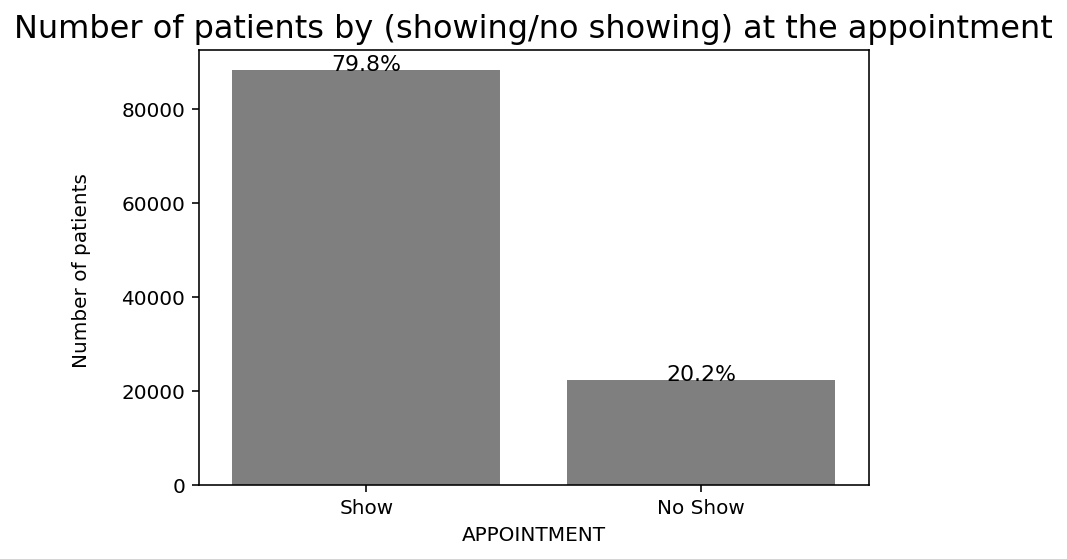

In [24]:
count_plot_one_vb(df, 'appointment',7)
plt.title('Number of patients by (showing/no showing) at the appointment',fontsize=16);

> **notes:**
* It is noted in the graph that the number of patients who show up at their appointments is much greater than those who not show up.
* 79.8% of the total patients showed up at their appointments.
* 20.2% of the total patients not showed up at their appointments.

<a id='rq2'></a>
### Research Question 2 : How many patients are female and are male, and what's the proportion of no-showing up at the appointment for each Gender? <a href="#top">^</a>

In [25]:
# number of patients grouping by 'gender' variable
gd = df.groupby('gender')['gender'].count()
sumgd = gd.sum()
print(gd)
print('\n From ',sumgd,' patents, there are ', gd[0], ' female, which represents', 
      round(gd[0]/sumgd,2)*100, '% of the total,','\n and ',gd[1], ' male, which represents', 
      round(gd[1]/sumgd,2)*100, '% of the total.')

gender
Female    71839
Male      38687
Name: gender, dtype: int64

 From  110526  patents, there are  71839  female, which represents 65.0 % of the total, 
 and  38687  male, which represents 35.0 % of the total.


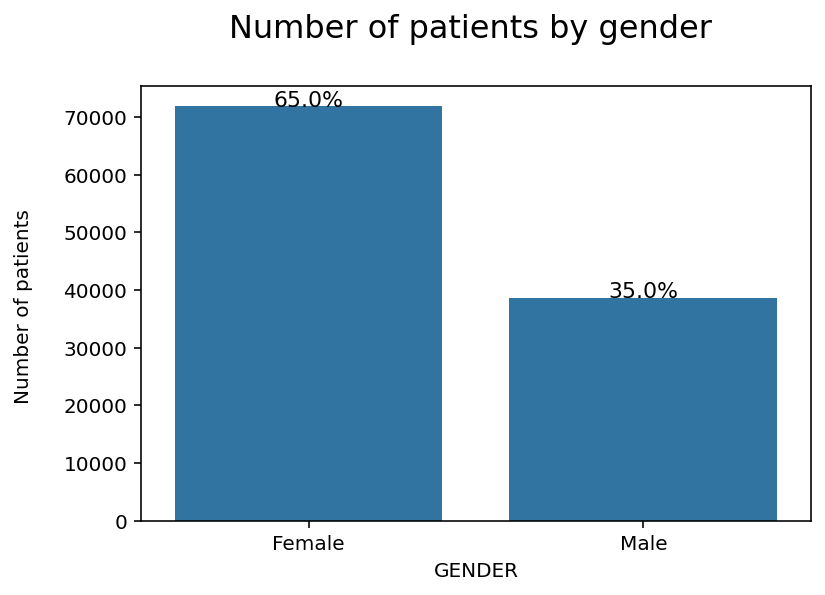

In [26]:
# gender count plot
count_plot_one_vb(df, 'gender',0)

> **observations:**
* It is noted in the graph that the number of female is much greater than male.
* 65% of total patients are females.
* 35% of total patients are males.

appointment,Show,No Show,All
gender,,,
Female,57245,14594,71839
Male,30962,7725,38687
All,88207,22319,110526


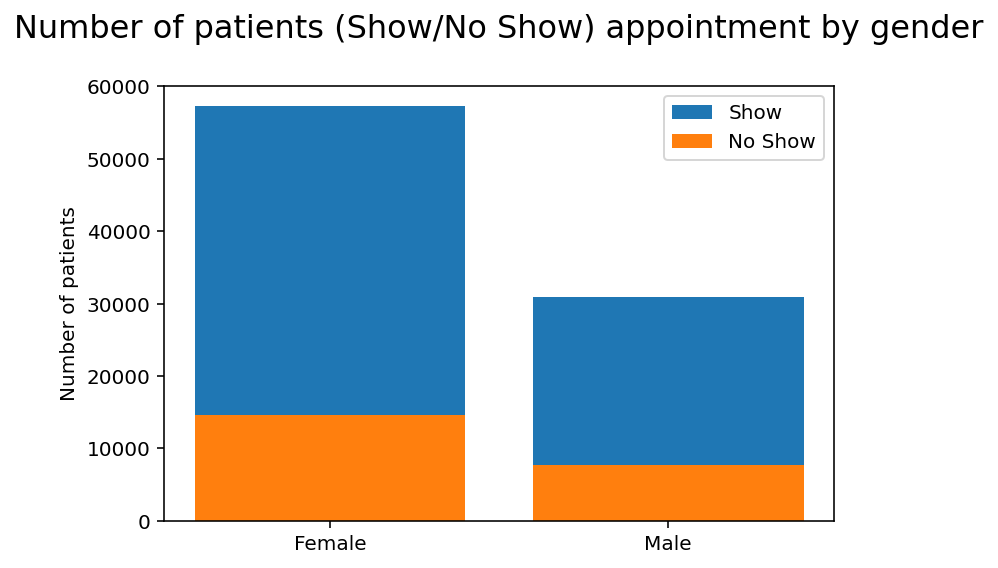

In [27]:
# stacked bar chart 'appointment' by Gender
stacked_bar_appointment_with_vb(df, 'gender')

> it appears that the same shape of female and male bar but just in different dimensions.

appointment,Show,No Show,All
gender,,,
Female,57245,14594,71839
Male,30962,7725,38687
All,88207,22319,110526


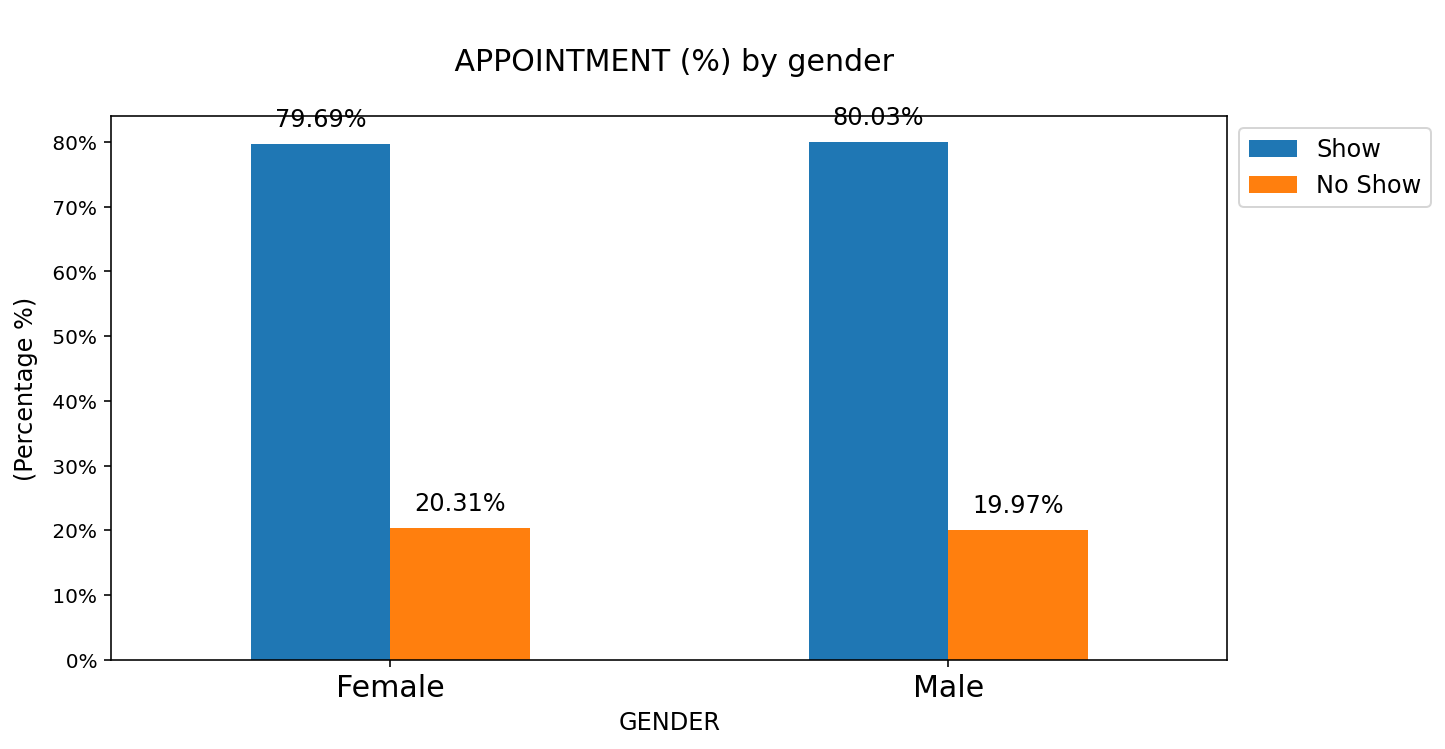

In [28]:
# bar chart comparison femal and mal by 'appointment' variable.
rate_bar_chart_2vb(df, 'gender', 'appointment')

> **notes:** <br />
let's focus on the no show rates for (`female` and `male`) because it's the matter of our study  >>
* for the females, we have `14,594` patients who not showed up at their appointments, which makes `20.31%` of all females (`71,839`).
* for the males, we have `7,725` patients who not showed up at their appointments, which makes `19.97%` of all males (`38,687`).
* there is only **`0.34%`** difference between females and males no showing up rate.
* from my analytical point of view, there is no significant effect of `gender` on patients not showing up for their medical appointments.

<a id='rq3'></a>
### Research Question 3: What are the characteristics of patients in terms of age?<a href="#top">^</a>

In [29]:
# unique values
print(df.age.nunique())
np.sort(df.age.unique())

103


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

> **observation:**
* there are `103` different ages.

In [30]:
# frequency 
df.age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

> **observation:**
* the most frequent age is `0`, i assume there are a babies.

In [31]:
# 
print(df.age.describe())

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64


> **observation:**
* the most frequent age is `0`, i assume there are a babies.

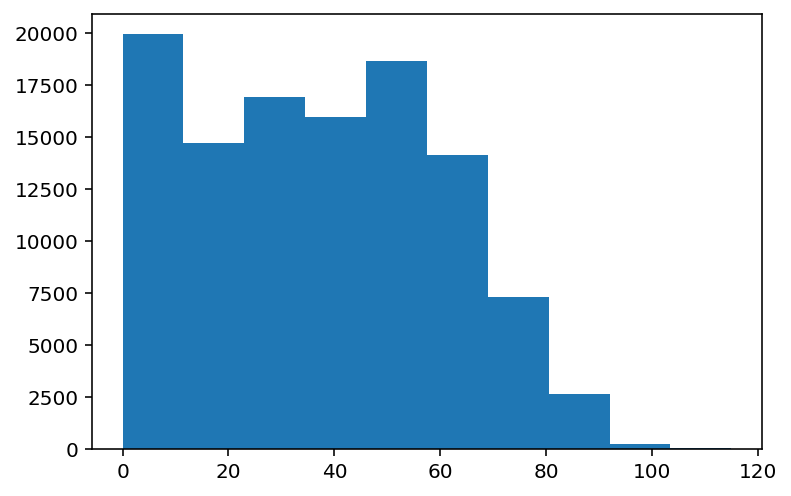

In [32]:
# simple histogram of 'age' variable
plt.hist(df.age,bins=10);


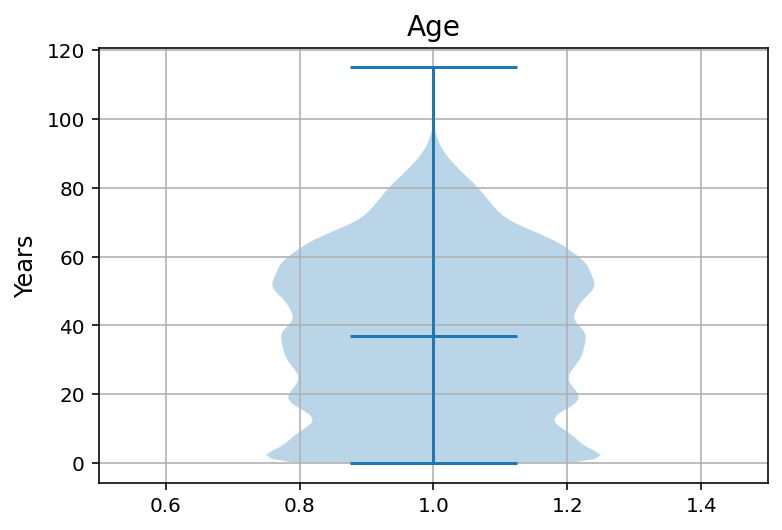

In [33]:
# violin plot of the 'age' series
plt.violinplot(df.age, showmedians=True)
plt.xlim([0.5,1.5])
plt.title('Age',fontsize=(14))
plt.ylabel('Years',fontsize=(12))
plt.grid();

> **observation:**
* from the two plots above, we can say that the age of the majority of patients is concentrated between `[0 - 60]` over a range of `[0 - 115]`

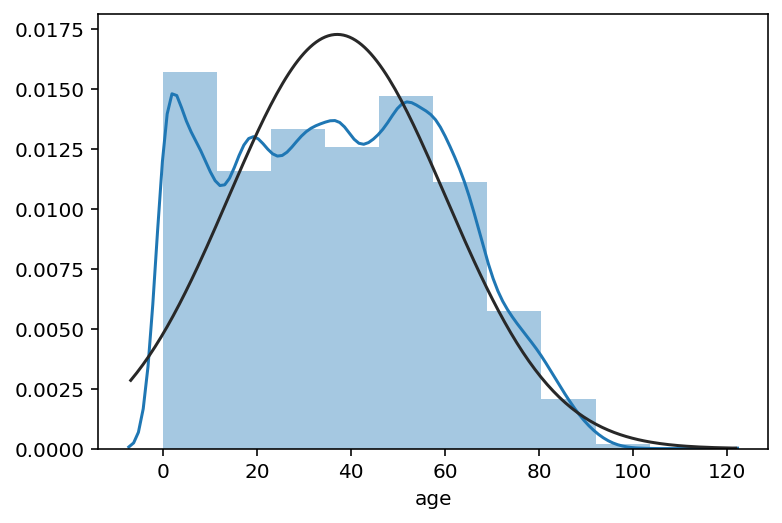

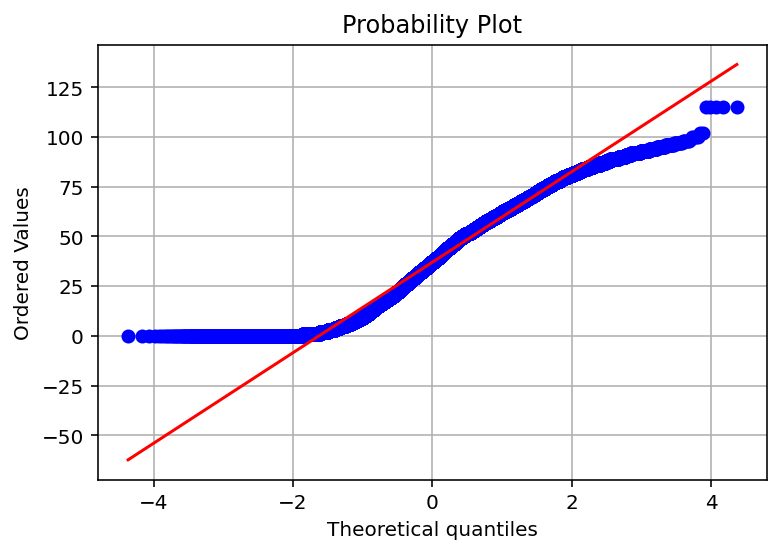

In [34]:
#histogram 'age' series and normal probability plot
sns.distplot(df.age, bins=10, fit=norm)
fig = plt.figure()
res = stats.probplot(df.age, plot=plt)
plt.grid();

> **observation:**
* from the two plots above, it's clear that the 'age' of patients is not Normally distributed. 

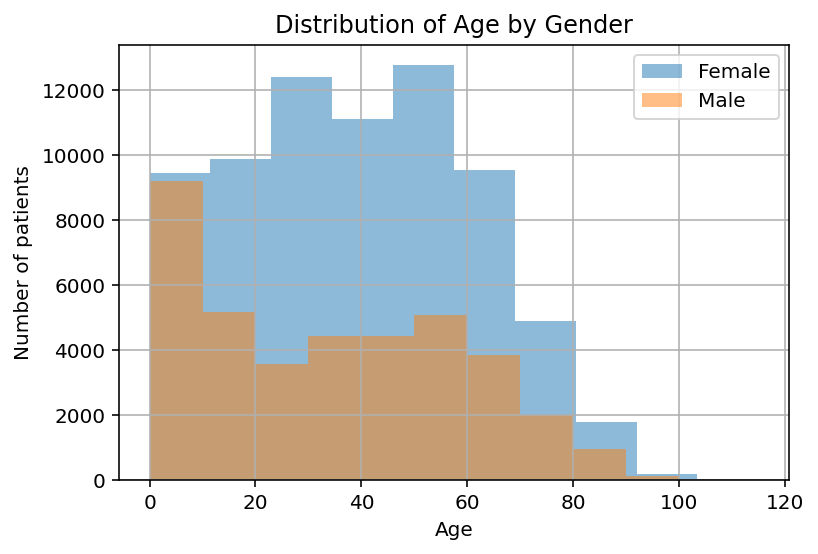

In [35]:
# create two dataframes frames one for 'female' and another for 'male'
female = df[df.gender == 'Female']
male = df[df.gender == 'Male']
# histogram for each Gender
female.age.hist(label='Female', alpha=0.5, bins=10)
male.age.hist(label='Male', alpha=0.5, bins=10)
plt.ylabel('Number of patients')
plt.xlabel('Age')
plt.title('Distribution of Age by Gender')
plt.legend();

> **observation:**
* the distribution of males' age is almost same than femals' age, however the number of females is much more than males. 

<a id='rq4'></a>
### Research Question 4: How many patients  and what's the-no showing rate for each age category?<a href="#top">^</a>

In [36]:
# number of patients grouping by 'age_category' variable
ac = df.groupby('age_category')['age_category'].count()
sumac = ac.sum()
print(ac)
print('\n From ',sumac,' patents, there are: \n -', ac[0], ' in [0 - 2] category, which represents', 
      round(ac[0]/sumac,3)*100, '% of the total,\n -', ac[1], ' in [3 - 17] category, which represents', 
      round(ac[1]/sumac,3)*100, '% of the total,\n -', ac[2], ' in [18 - 39] category, which represents', 
      round(ac[2]/sumac,3)*100, '% of the total,\n -', ac[3], ' in [40 - 59] category, which represents', 
      round(ac[3]/sumac,4)*100, '% of the total,\n -',' and ',ac[4], ' in [60 - 115] category, which represents', 
      round(ac[4]/sumac,3)*100, '% of the total.')

age_category
0 - 2        7430
3 - 17      19949
18 - 39     31902
40 - 59     31483
60 - 115    19762
Name: age_category, dtype: int64

 From  110526  patents, there are: 
 - 7430  in [0 - 2] category, which represents 6.7 % of the total,
 - 19949  in [3 - 17] category, which represents 18.0 % of the total,
 - 31902  in [18 - 39] category, which represents 28.9 % of the total,
 - 31483  in [40 - 59] category, which represents 28.48 % of the total,
 -  and  19762  in [60 - 115] category, which represents 17.9 % of the total.


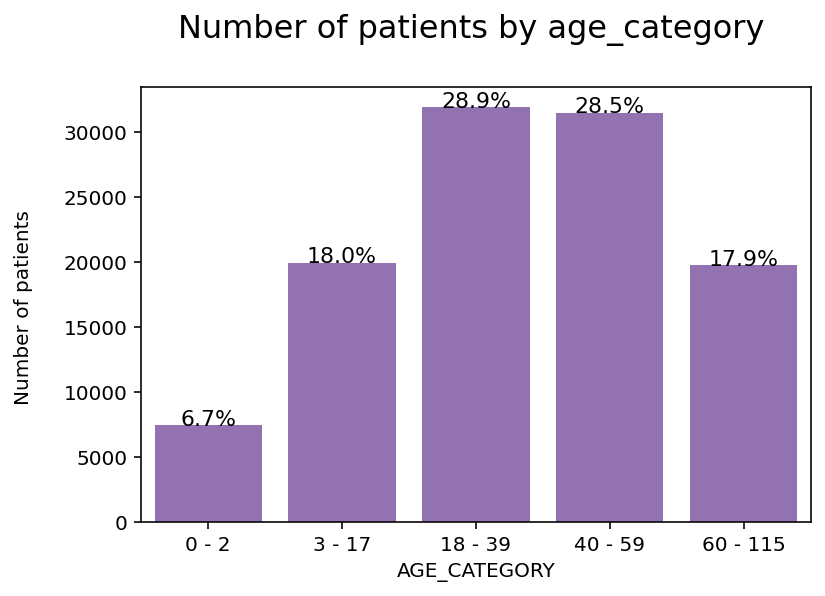

In [37]:
# bar plot with proportion age category
count_plot_one_vb(df,'age_category',4)

> **observations:**
according to this bar chart of age category, we notice that:
* the two categories ([`18 - 39`] and [`40 - 59`]) are the most frequent,
* the category of babies ([`0 - 2`]) is the least frequent.

appointment,Show,No Show,All
age_category,,,
0 - 2,6124,1306,7430
3 - 17,15258,4691,19949
18 - 39,24478,7424,31902
40 - 59,25591,5892,31483
60 - 115,16756,3006,19762
All,88207,22319,110526


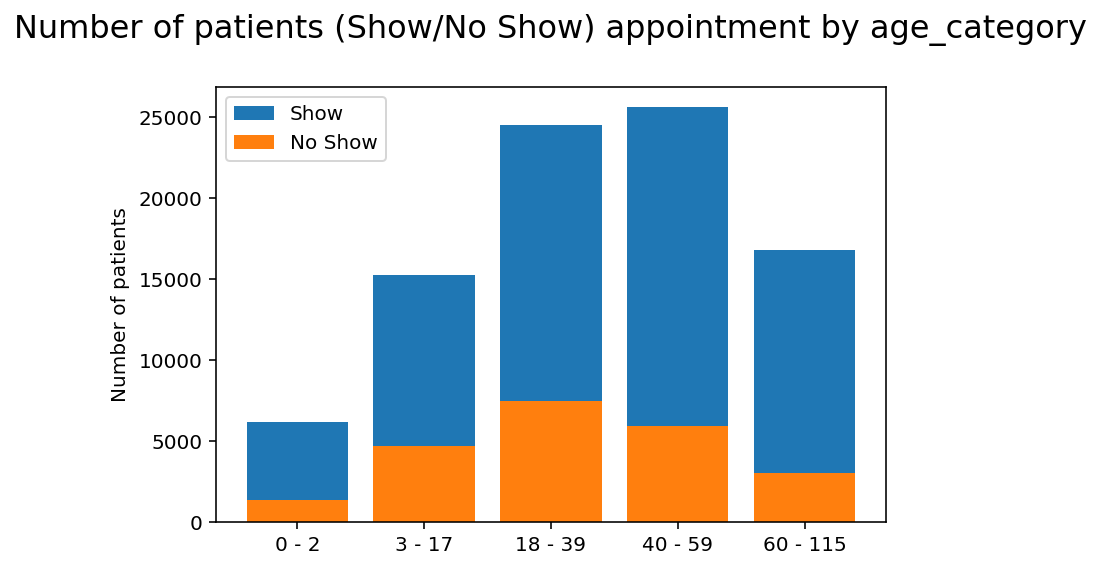

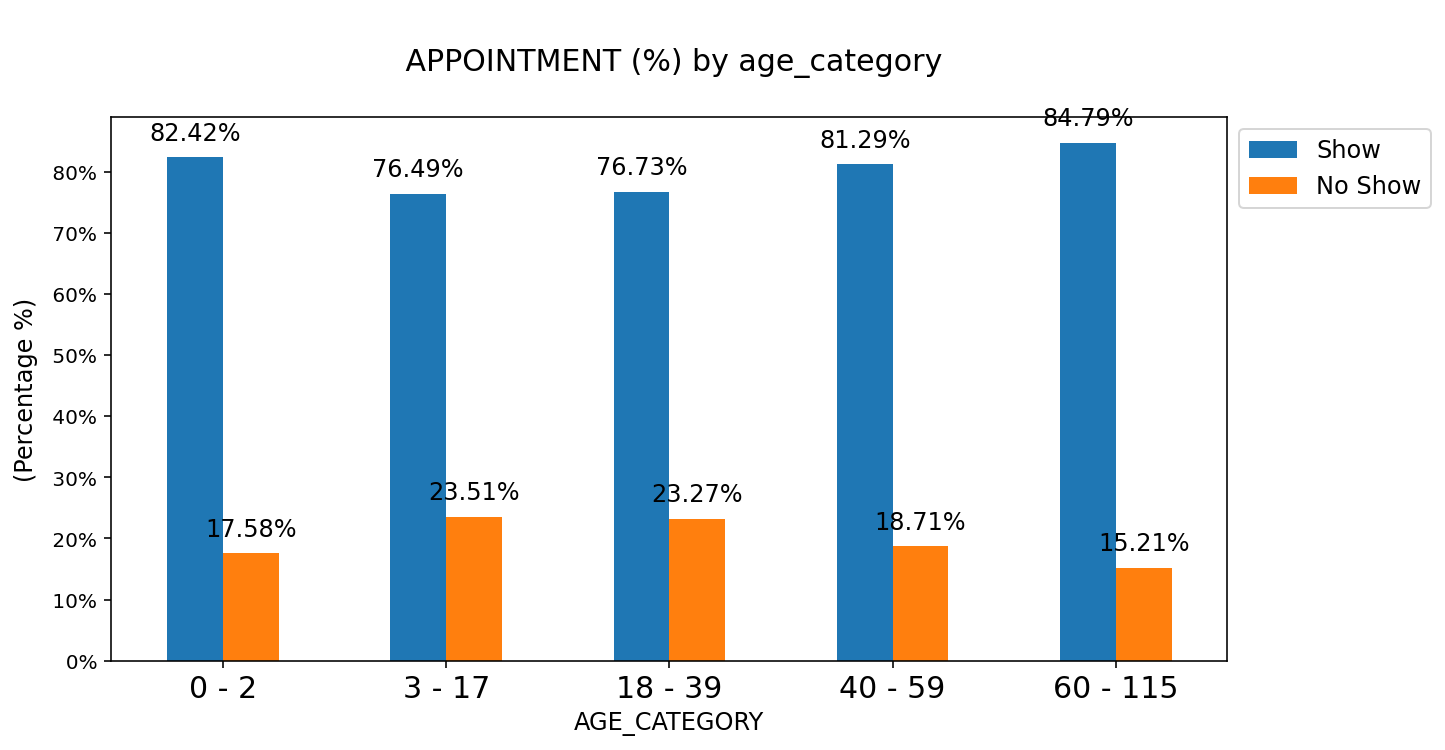

In [73]:
# stacked bar chart 'appointment' by age_category 
stacked_bar_appointment_with_vb(df, 'age_category')

# bar chart comparison proportion of (show/no show) by 'age_category' variable.
rate_bar_chart_2vb(df, 'age_category', 'appointment')

> **notes:** <br />
let's focus on the no show rates for each age category because it's the matter of our study  >>

* for the [**`0 - 2`**] category, we have `1,306` patients who not showed up at their appointments, which makes **`17.58%`** of all patients of this category (`7,430`).
<br />

* for the [**`3 - 17`**] category, we have `4,691` patients who not showed up at their appointments, which makes **`23.51%`** of all patients of this category (`19,949`).
<br />

* for the [**`18 - 39`**] category, we have `7,424` patients who not showed up at their appointments, which makes **`23.27%`** of all patients of this category (`31,902`).
<br />

* for the [**`40 - 59`**] category, we have `5,892` patients who not showed up at their appointments, which makes **`18.71%`** of all patients of this category (`31,483`).
<br />

* for the [**`60 - 115`**] category, we have `3,006` patients who not showed up at their appointments, which makes **`15.21%`** of all patients of this category (`19,762`).
<br />

* the highest rates of no-showing are (**`23.51%`** and **`23.27%`**) which belong respectively to the categories ([**`18 - 39`**] and [**`40 - 59`**]),
* from my analytical point of view, there is an effect of `age` on the patients no-showing rate.

gender,Female,Male,All
age_category,,,
0 - 2,3566,3864,7430
3 - 17,10332,9617,19949
18 - 39,23076,8826,31902
40 - 59,21591,9892,31483
60 - 115,13274,6488,19762
All,71839,38687,110526


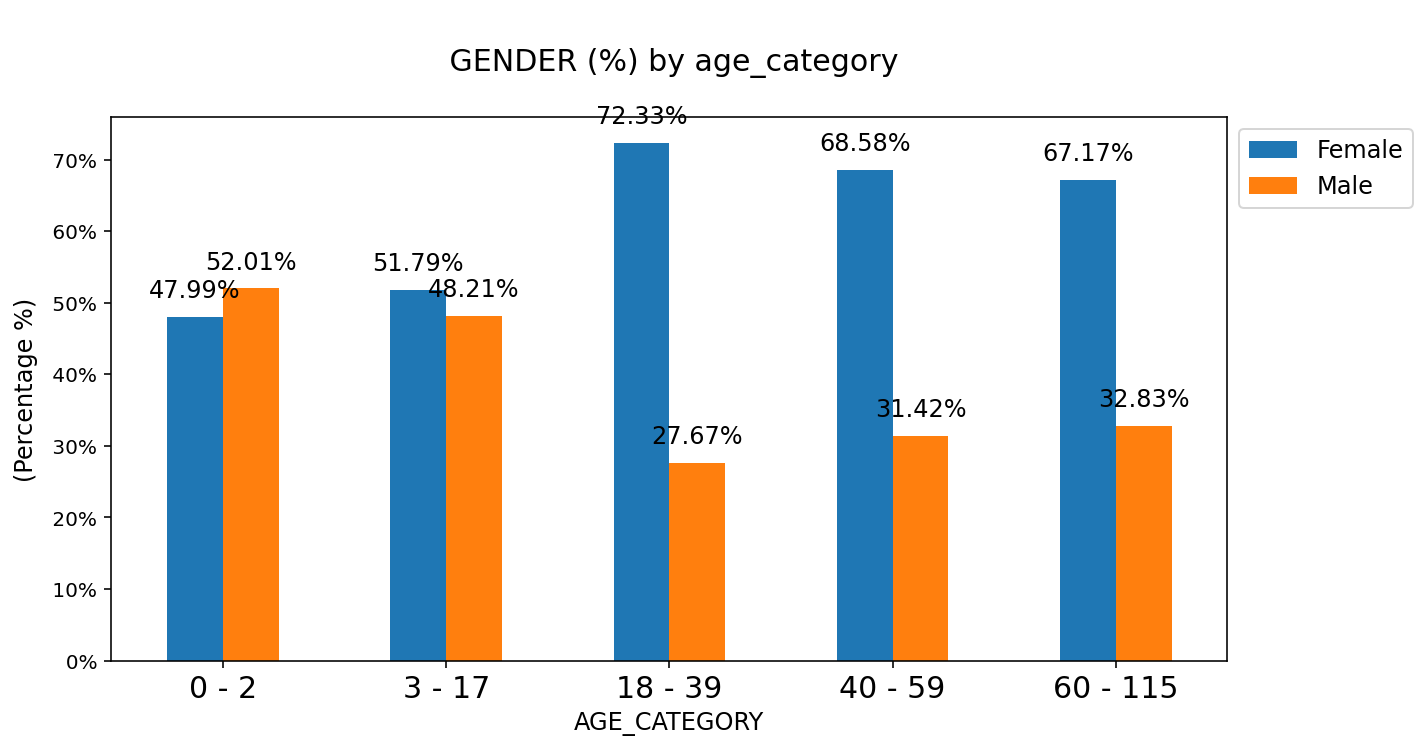

In [39]:
# bar chart comparison proportion of (Female/Male) by 'age_category' variable.
rate_bar_chart_2vb(df, 'age_category', 'gender')

> **notes:** 

* in the first two categories we have the number of females is almost equal to the number of males,
* in the three least categories the number of females is almost twice the number of males.

<a id='rq5'></a>
### Research Question 5: How many patients have (a scholarship / don't have it), and what's the proportion of no-showing up at the appointment for each situation?<a href="#top">^</a>

In [40]:
# number of patients grouping by 'scholarship' variable
sh = df.groupby('scholarship')['scholarship'].count()
sumsh = sh.sum()
print(sh)
print('\n From ',sumsh,' patents, there are ', sh[1], ' who have a scholarship, which represents', 
      round(sh[1]/sumsh,3)*100, '% of the total,','\n and ',sh[0], ' who haven not a scholarship, which represents', 
      round(sh[0]/sumsh,3)*100, '% of the total.')

scholarship
No Scholarship    99665
Scholarship       10861
Name: scholarship, dtype: int64

 From  110526  patents, there are  10861  who have a scholarship, which represents 9.8 % of the total, 
 and  99665  who haven not a scholarship, which represents 90.2 % of the total.


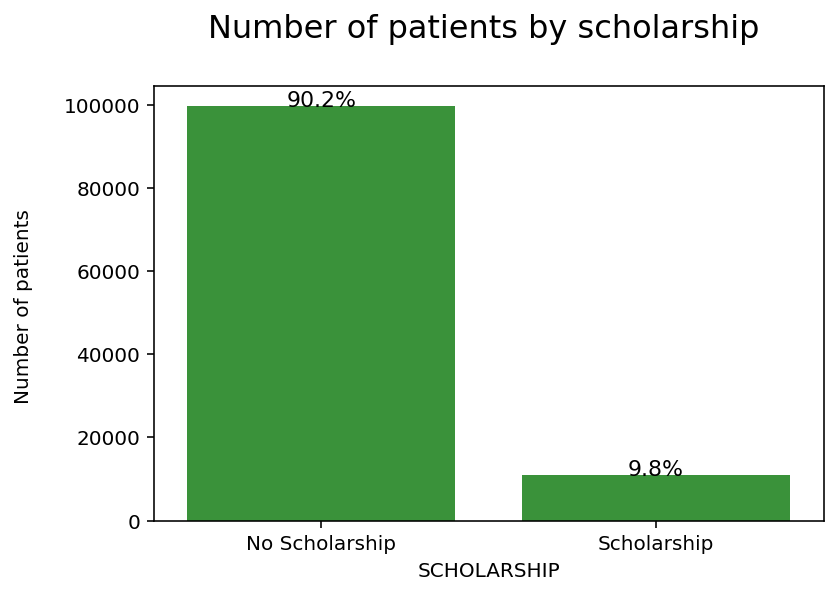

In [41]:
# scholarship count plot
count_plot_one_vb(df, 'scholarship',2)

> **observations:**
* from the graph above, we find that the number of having a scholarship is much less than the number of not having it.
* 9.8% of total patients have a scholarship.
* 90.2% of total patients have not a scholarship.

appointment,Show,No Show,All
scholarship,,,
No Scholarship,79924,19741,99665
Scholarship,8283,2578,10861
All,88207,22319,110526


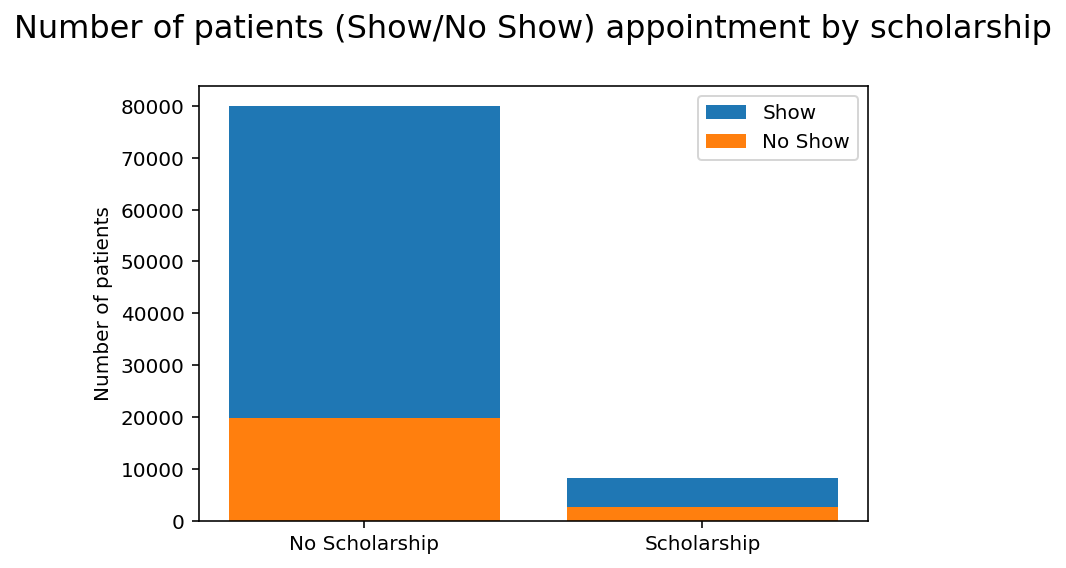

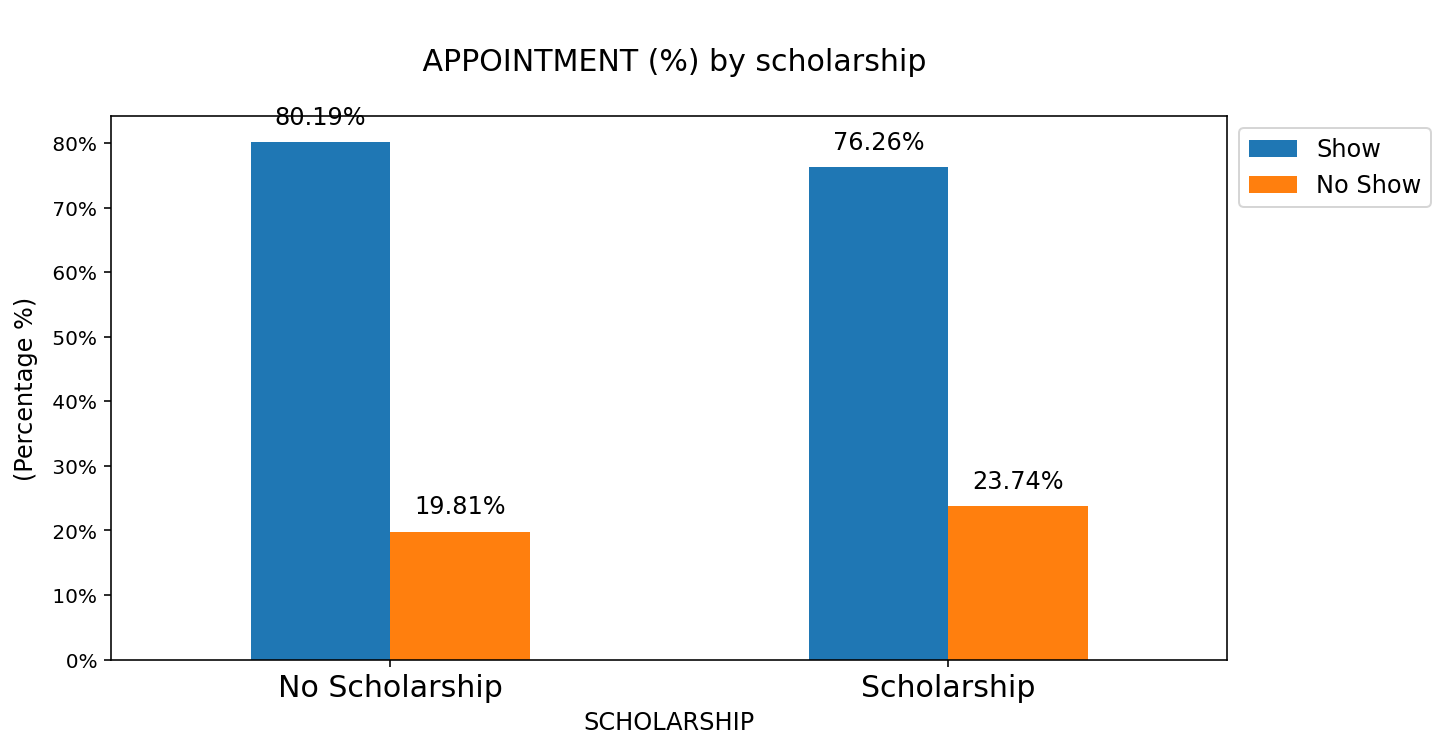

In [42]:
# stacked bar chart 'appointment' by Scholarship 
stacked_bar_appointment_with_vb(df, 'scholarship')

# bar chart comparison the proportion of (show/no show) by 'scholarship' variable.
rate_bar_chart_2vb(df, 'scholarship', 'appointment')

> **notes:** <br />
let's focus on the no show rates because it's the matter of our study  >>
* for the patients who have a scholarship, we have `2,578` patients who not showed up at their appointments, which makes `23,74%` of all `10,861` patients,
* for the patients who haven't a scholarship, we have `19,741` patients who not showed up at their appointments, which makes `19.81%` of all `99,665` patients,
* It seems to be given a scholarship may contribute to increasing the no showing rate.

<a id='rq6'></a>
### Research Question 6: How many patients have( hypertension / don't have it), and what's the proportion of no-showing up at the appointment for each situation?<a href="#top">^</a>

In [43]:
# number of patients grouping by 'hypertension' variable
hy = df.groupby('hypertension')['hypertension'].count()
sumhy = hy.sum()
print(hy)
print('\n From ',sumhy,' patents, there are ', hy[1], ' who have an hypertension, which represents', 
      round(hy[1]/sumhy,3)*100, '% of the total,','\n and ',hy[0], ' who haven not an hypertension, which represents', 
      round(hy[0]/sumhy,4)*100, '% of the total.')

hypertension
No Hypertension    88725
Hypertension       21801
Name: hypertension, dtype: int64

 From  110526  patents, there are  21801  who have an hypertension, which represents 19.7 % of the total, 
 and  88725  who haven not an hypertension, which represents 80.28 % of the total.


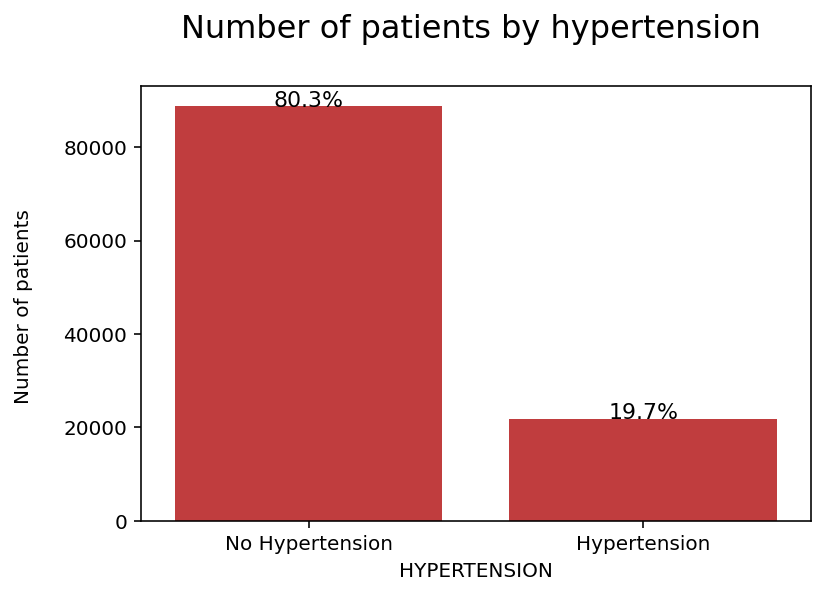

In [44]:
# hypertension count plot
count_plot_one_vb(df, 'hypertension',3)

> **observations:**
* from the graph above, we find that the number of having an hypertension is much less than the number of don't having it.
* 19.7% of total patients have an hypertension.
* 80.3% of total patients have not an hypertension.

appointment,Show,No Show,All
hypertension,,,
No Hypertension,70178,18547,88725
Hypertension,18029,3772,21801
All,88207,22319,110526


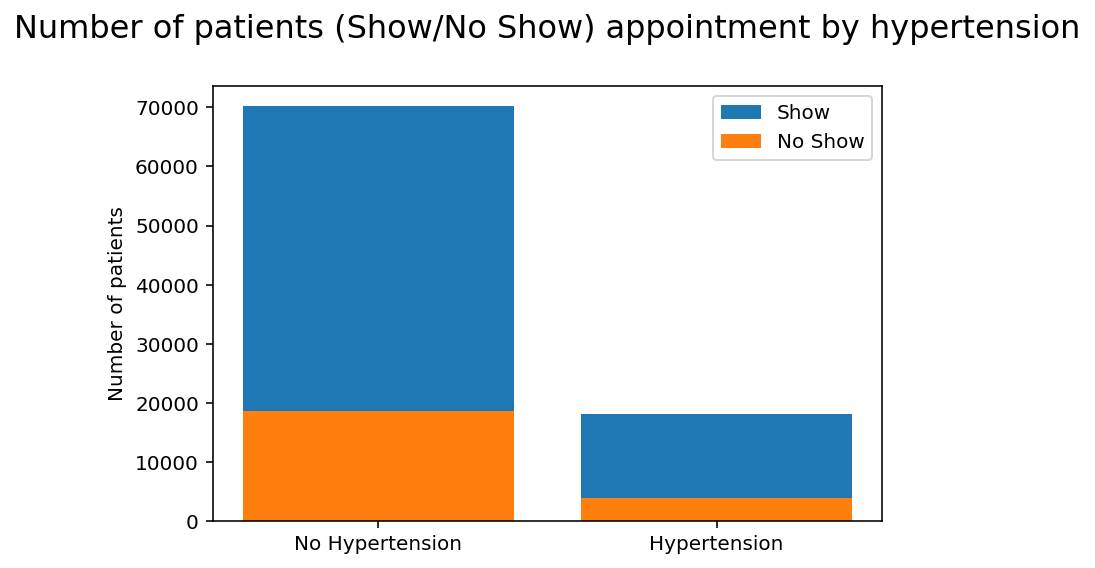

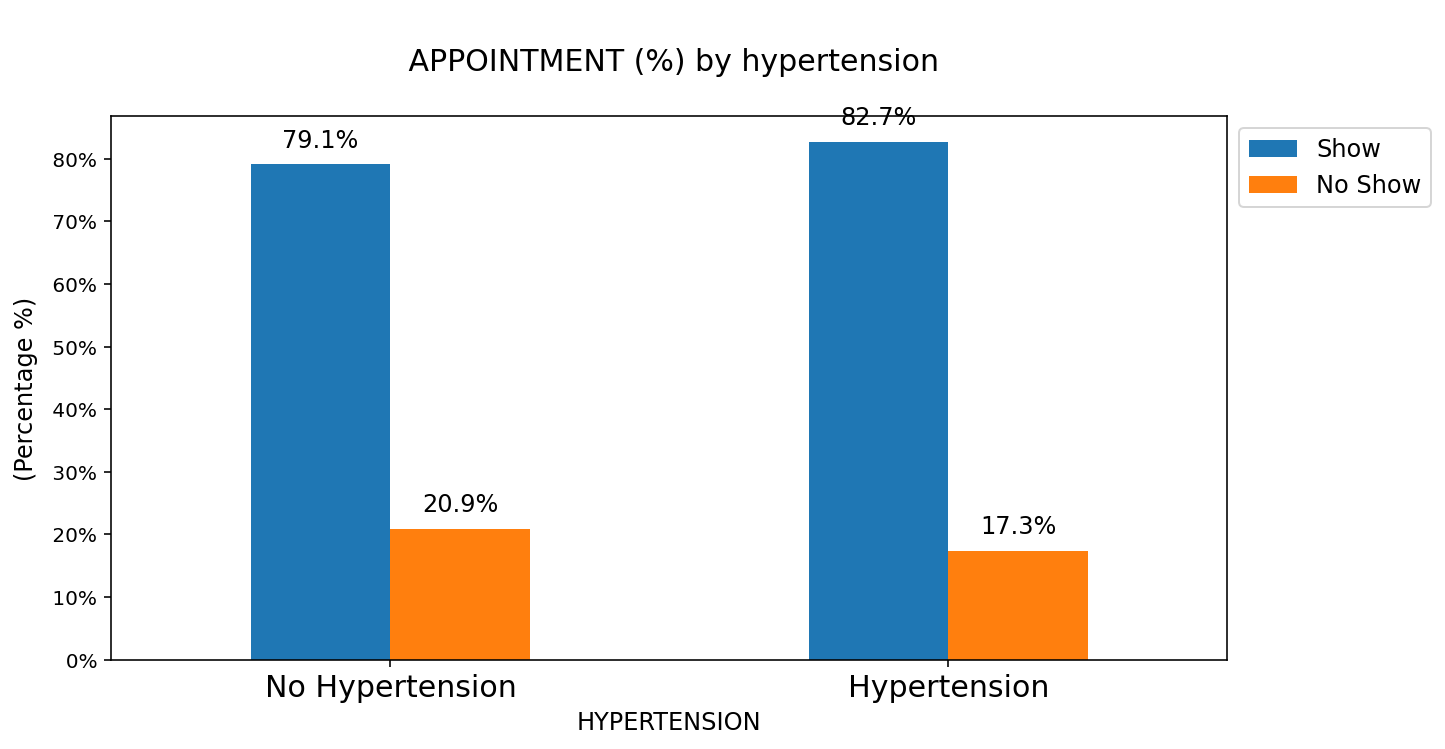

In [45]:
# stacked bar chart 'appointment' by hypertension 
stacked_bar_appointment_with_vb(df, 'hypertension')

# bar chart comparison the proportion of (show/no show) by 'hypertension' variable.
rate_bar_chart_2vb(df, 'hypertension','appointment')

> **notes:** <br />
let's focus on the no show rates because it's the matter of our study  >>
* for the patients who have an hypertension, we have `3,772` patients who not showed up at their appointments, which makes `17.3%` of all `21,801` patients,
* for the patients who haven't an hypertension, we have `18,547` patients who not showed up at their appointments, which makes `20.9%` of all `88,725` patients,
* the no showing rate of the patients having an hypertension is less than those who haven't an hypertension.
* It seems to have an hypertension may contribute to decreasing the no showing rate.

hypertension,No Hypertension,Hypertension,All
age_category,,,
0 - 2,7430.0,NaN,7430
3 - 17,19911.0,38.0,19949
18 - 39,30341.0,1561.0,31902
40 - 59,22283.0,9200.0,31483
60 - 115,8760.0,11002.0,19762
All,88725.0,21801.0,110526


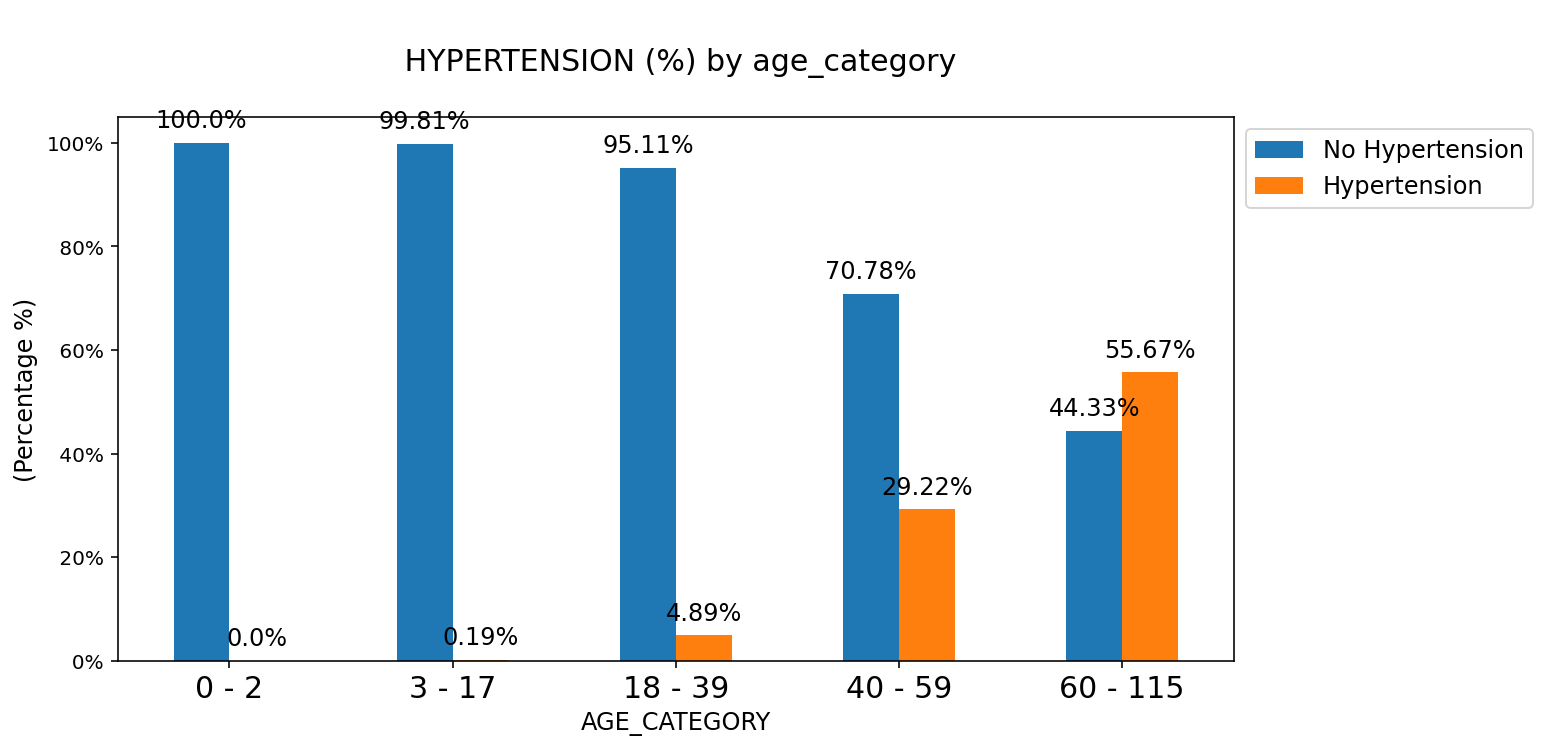

In [46]:
# bar chart comparison the proportion of (hypertension/no hypertension) by 'age_category' variable.
rate_bar_chart_2vb(df, 'age_category', 'hypertension')

> **notes:** <br />
let's focus on the having an hypertension rates for each age category  >>

* for the [**`0 - 2`**] category, there is no patient having an hypertension, which makes **`0.0%`** of all patients of this category (`7,430`).
<br />

* for the [**`3 - 17`**] category, ther are `38` patients who have an hypertension, which makes **`0.19%`** of all patients of this category (`19,949`).
<br />

* for the [**`18 - 39`**] category, we have `1,561` patients who have an hypertension, which makes **`4.89%`** of all patients of this category (`31,902`).
<br />

* for the [**`40 - 59`**] category, we have `9,200` patients who have an hypertension, which makes **`29.22%`** of all patients of this category (`31,483`).
<br />

* for the [**`60 - 115`**] category, we have `11,002` patients who have an hypertension, which makes **`55.57%`** of all patients of this category (`19,762`).
<br />

* the Elderly category has the highest incidence of hypertension rate.
* it has been noted that the greater the age, the greater the incidence of hypertension.

<a id='rq7'></a>
### Research Question 7: How many patients are (diabetics / not diabetics), and what's the proportion of no-showing up at the appointment for each situation?<a href="#top">^</a>

In [47]:
# number of patients grouping by 'diabetes' variable
db = df.groupby('diabetes')['diabetes'].count()
sumdb = db.sum()
print(db)
print('\n From ',sumdb,' patents, there are ', db[1], ' who have an diabetes, which represents', 
      round(db[1]/sumdb,4)*100, '% of the total,','\n and ',db[0], ' who haven not an diabetes, which represents', 
      round(db[0]/sumdb,4)*100, '% of the total.')

diabetes
No Diabetes    102583
Diabetes         7943
Name: diabetes, dtype: int64

 From  110526  patents, there are  7943  who have an diabetes, which represents 7.19 % of the total, 
 and  102583  who haven not an diabetes, which represents 92.81 % of the total.


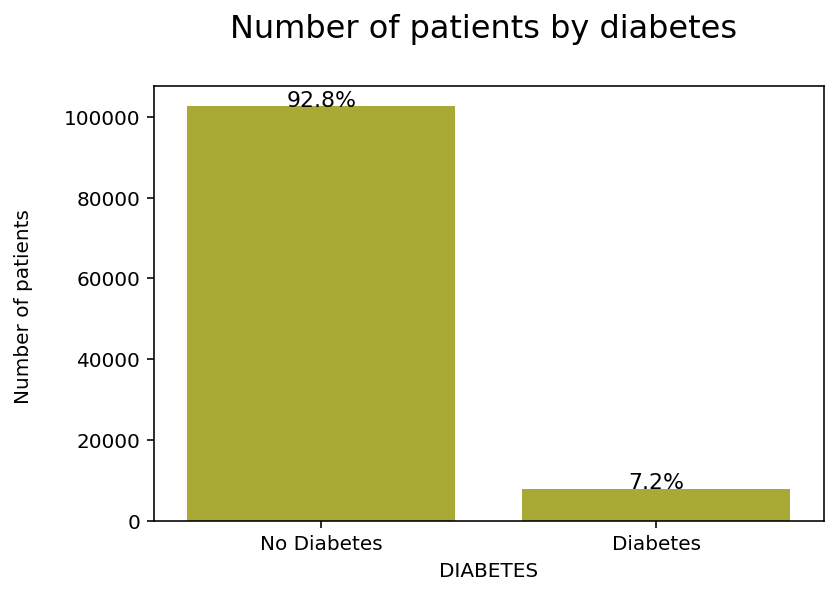

In [48]:
# diabetes count plot
count_plot_one_vb(df, 'diabetes',8)

> **observations:**
* from the graph above, we find that the number of diabetic patients is much less than the number of non-diabetic.
* 7.2% of total patients are diabetics.
* 92.8% of total patients are non-diabetic.

appointment,Show,No Show,All
diabetes,,,
No Diabetes,81694,20889,102583
Diabetes,6513,1430,7943
All,88207,22319,110526


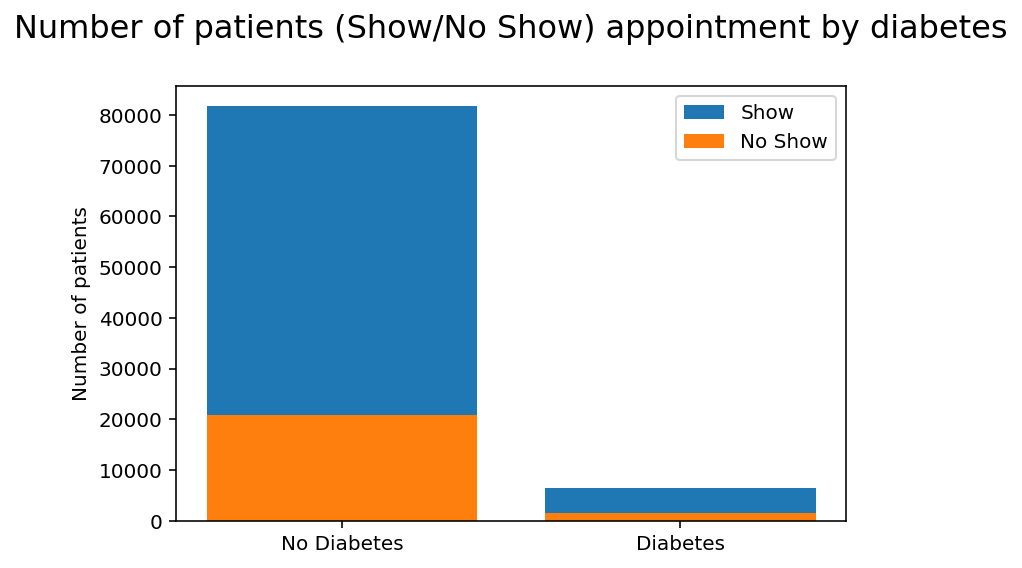

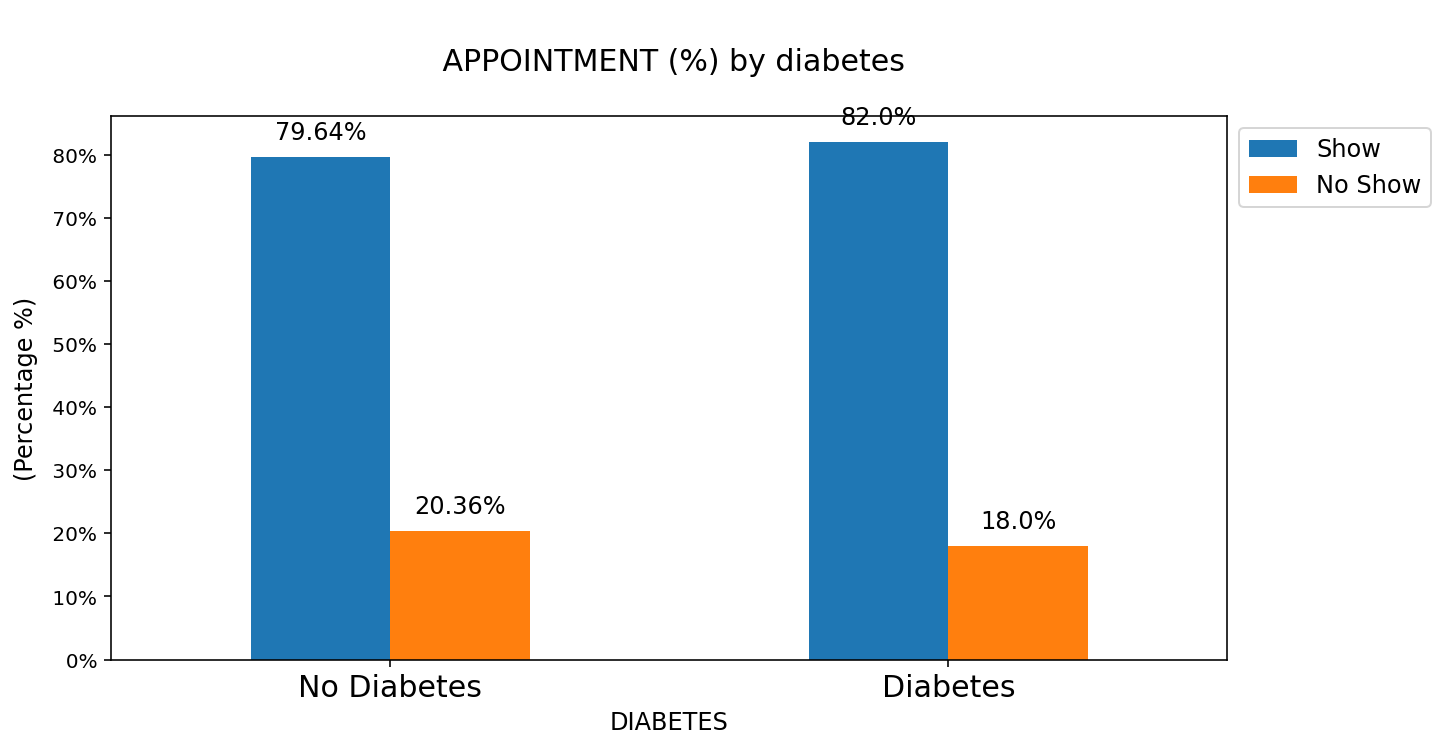

In [49]:
# stacked bar chart 'appointment' by diabetes 
stacked_bar_appointment_with_vb(df, 'diabetes')

# bar chart comparison the proportion of (show/no show) by 'diabetes' variable.
rate_bar_chart_2vb(df, 'diabetes','appointment')

> **notes:** <br />
let's focus on the no show rates  >>
* for the patients who have a diabetes, we have `1,430` patients who not showed up at their appointments, which makes `18%` of all `7,943` patients,
* for the patients who haven't a diabetes, we have `20,889` patients who not showed up at their appointments, which makes `20.36%` of all `102,583` patients,
* the no showing rate of the patients having a diabetes is less than those who haven't a diabetes.
* It seems to have a diabetes may contribute to decreasing the no showing rate.

diabetes,No Diabetes,Diabetes,All
age_category,,,
0 - 2,7428,2,7430
3 - 17,19900,49,19949
18 - 39,31440,462,31902
40 - 59,28440,3043,31483
60 - 115,15375,4387,19762
All,102583,7943,110526


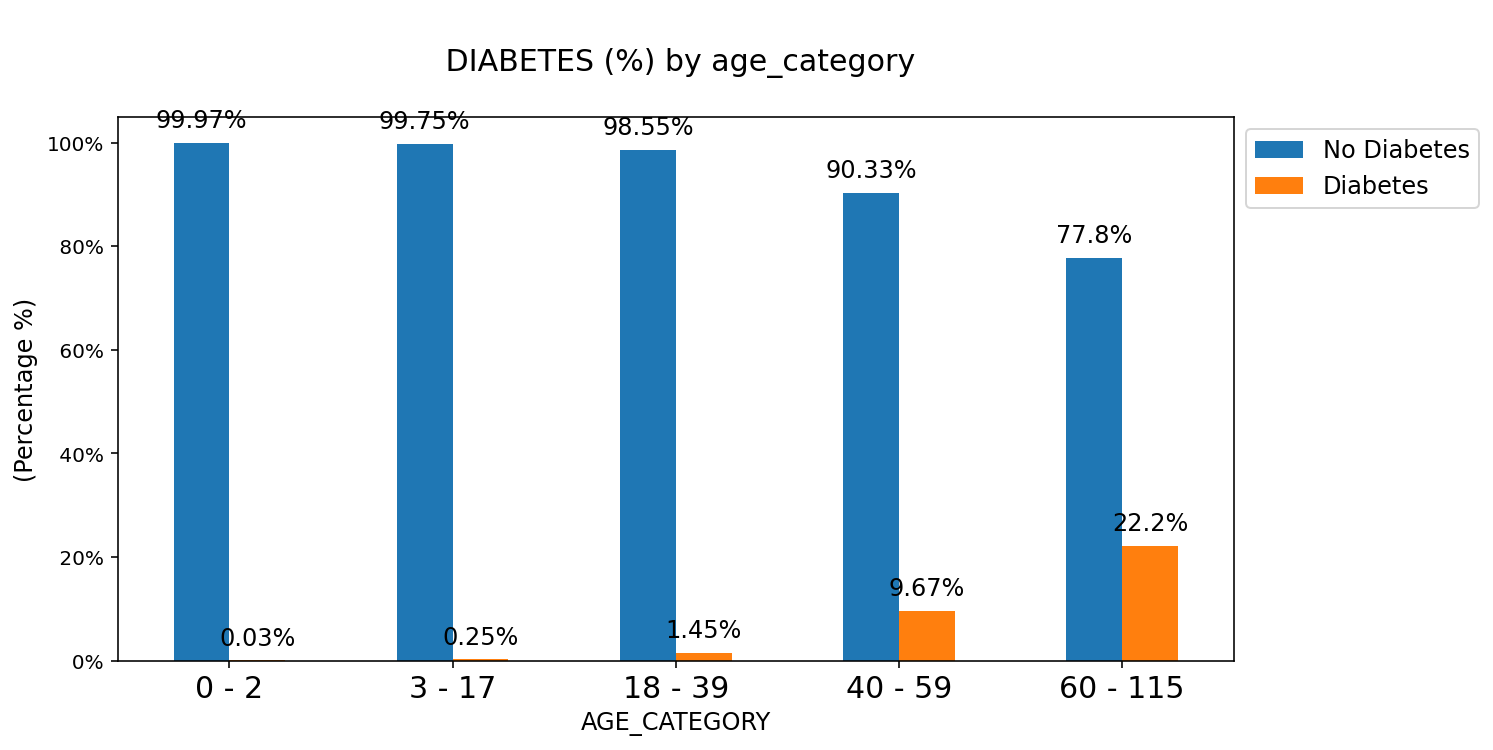

In [50]:
# bar chart comparison the proportion of (diabetic/no diabetic) by 'age_category' variable.
rate_bar_chart_2vb(df, 'age_category', 'diabetes')

> **notes:** <br />
let's focus on the being diabetic rates for each age category  >>

* for the [**`0 - 2`**] category, ther are `2	` patients who have an hypertension, which makes **`0.03%`** of all patients of this category (`7,430`).
<br />

* for the [**`3 - 17`**] category, ther are `49` patients who have an hypertension, which makes **`0.25%`** of all patients of this category (`19,949`).
<br />

* for the [**`18 - 39`**] category, we have `462` patients who have an hypertension, which makes **`1.45%`** of all patients of this category (`31,902`).
<br />

* for the [**`40 - 59`**] category, we have `3,043` patients who have an hypertension, which makes **`9.67%`** of all patients of this category (`31,483`).
<br />

* for the [**`60 - 115`**] category, we have `4,387` patients who have an hypertension, which makes **`22.2%`** of all patients of this category (`19,762`).
<br />

* the Elderly category has the highest incidence of diabetes rate.
* it has been noted that the greater the age, the greater the incidence of diabetes.

hypertension,No Hypertension,Hypertension,All
diabetes,,,
No Diabetes,87268,15315,102583
Diabetes,1457,6486,7943
All,88725,21801,110526


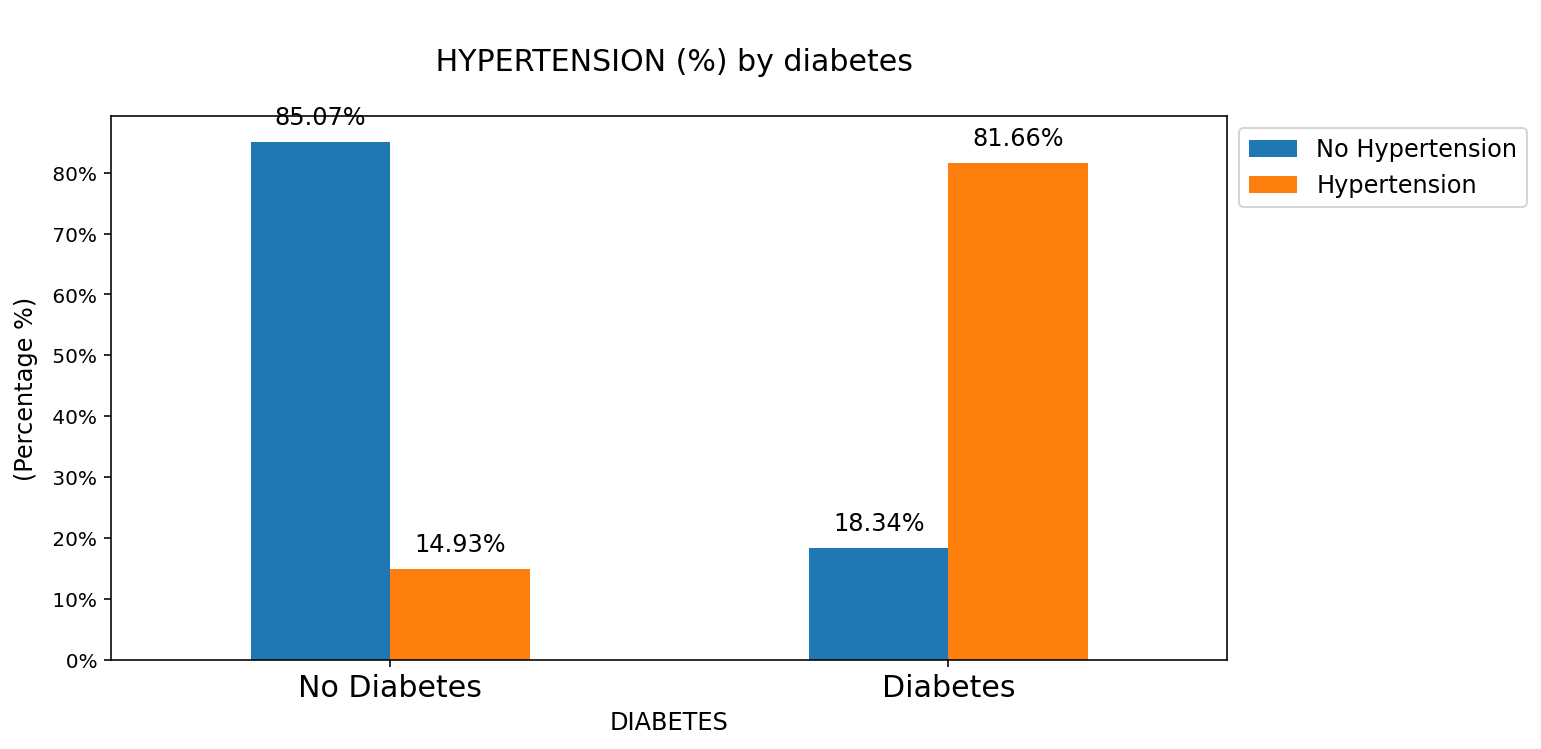

In [51]:
# bar chart comparison the proportion of (hypertension/no hypertension) by 'diabetes' variable.
rate_bar_chart_2vb(df, 'diabetes', 'hypertension')

> **notes:** <br />
let's focus on the having hypertension rates  >>
* for the diabetic patients, we have `6,486` patients who have an hypertension, which makes `81.66%` of all `7,943` diabetic patients,
* for the non-diabetic patients, we have `15,315` who have an hypertension, which makes `14,93%` of all `102,583` patients,
* the having hypertension rate of the diabetic patients is more than the hypertension rate of those who are non-diabetics.
* It seems exist a positive correlation between be diabetic and have an hypertension.

<a id='conclusions'></a>
## Conclusions <a href="#top">^</a>

> As mentioned in the introduction, this study remains descriptive and limited to only 6 variables, and in no way provides real and precise explanations for The reasons why patients do not showed up for their scheduled medical appointments because there are any inferential statistics included, however it indicates some factors that may cause this behavior.

> **After analyzing these 6 variables, we reach the results below**:
* The overall no-showing rate is `20.2%`, less than the overall show-up rate (`79.8%`).
* The percentage of females is greater than males _ `65% > 35%`.
* From the age `0 to 17`, the number of females is almost equal to the number of males,
* From the age `18 to 115`, the number of females is almost twice the number of males.
* There is no significant effect of gender on no-showing rate (20% for each gender).
* The most frequent age categories are ([`18 - 39`] and [`40 - 59`]) which they mark the highest rates of no-showing `23.5%` for both.
* There is an effect of `age` on the patients no-showing rate.
* The percentage of having a scholarship is much less than not having a scholarship _ `9.8% < 90.2%`.
* The percentage of having an hypertension is much less than not having an hypertension _ `19.7% < 80.3%`.
* The percentage of the diabetic patients is much less than the non-diabetic patients _ `7.2% < 92.8%` are s
* There is a positive correlation between `hypertension` and `diabetes`, and between both of them with `age`.



<a id='references'></a>
## References  <a href="#top">^</a>
* https://pandas.pydata.org/
* https://numpy.org/
* https://matplotlib.org
* https://www.kaggle.com/
* https://github.com/
* https://classroom.udacity.com/courses/ud170-nd
* https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
* https://daringfireball.net/projects/markdown/syntax#list
 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])